In [3]:
import pandas as pd
import os
from pathlib import Path 
import math
import pymongo
from pymongo import MongoClient

In [14]:
def unpack(results):
  rs = []
  for r in results:
    r['item']['result'] = r['result']
    rs.append(r['item'])
  return rs

In [15]:
client = MongoClient()
db = client['bfg']
trade_results = db.tradeResultEntity
test = pd.DataFrame(unpack(list(trade_results.find())))

In [19]:
test

,size,wantedEntryLevel,actualEntryLevel,entryTime,exitTime,wantedExitLevel,actualExitLevel,direction,entryType,oneR,barsInTrade,result
0,1.0,12052.200,12052.200,2022-06-28 13:58:39.745,2022-06-28 14:00:12.429,12001.480089,12077.5600,BUY,BUY_HIGH,50.719911,2,0.500001
1,1.0,1928.135,1928.135,2022-06-28 13:59:56.638,2022-06-28 14:02:20.921,1931.455488,1926.4748,SELL,SELL_LOW,3.320488,3,0.499987
2,1.0,12052.200,12052.200,2022-06-28 14:02:24.332,2022-06-28 14:05:24.006,12000.695498,12010.6955,BUY,BUY_HIGH,51.504502,3,-0.805842
3,5.0,3923.740,3923.740,2022-06-28 14:03:40.428,2022-06-28 14:07:29.022,3912.951258,3913.9513,BUY,BUY_HIGH,10.788742,4,-0.907307
4,1.0,6118.800,6118.800,2022-06-28 14:07:39.317,2022-06-28 14:11:18.382,6106.658763,6124.8706,BUY,BUY_HIGH,12.141237,4,0.499998
5,1.0,12010.600,12010.600,2022-06-28 14:11:32.537,2022-06-28 14:20:57.339,12067.221161,11982.2894,SELL,SELL_LOW,56.621161,9,0.500000
6,1.0,6118.800,6118.800,2022-06-28 14:23:49.352,2022-06-28 14:27:08.218,6106.564916,6124.9175,BUY,BUY_HIGH,12.235084,4,0.499997
7,5.0,3916.240,3916.240,2022-06-28 14:19:58.834,2022-06-28 14:30:00.324,3905.657938,3910.0300,BUY,BUY_LOW,10.582062,11,-0.586842
8,1.0,13284.800,13284.800,2022-06-28 14:21:11.353,2022-06-28 14:30:54.567,13257.481013,13267.4810,BUY,BUY_HIGH,27.318987,9,-0.633955
9,1.0,6118.800,6118.800,2022-06-28 14:29:37.677,2022-06-28 14:32:28.605,6106.249361,6106.2494,BUY,BUY_HIGH,12.550639,3,-0.999997


In [18]:
test['result'].sum() / len(test)

0.04213506599243243

In [12]:
home = str(Path.home())
filepaths = [f'{home}/bfg/demo/{f}' for f in os.listdir(home + '/bfg/demo') if f.endswith('.csv')]
df = pd.concat(map(pd.read_csv, filepaths))
# Caclulate how many pips +- each trade generated
df['result_pips'] = df.apply(lambda x: x['exit_level'] - x['actual_entry_level'] if 'LONG' in x['reference'] else x['actual_entry_level'] - x['exit_level'], axis=1)
# Caclulate the R multiple for the trade should be between -1 and +2 for my system
df['r_result'] = df['result_pips'] / df['one_r']

Expectency and SQN

<AxesSubplot:ylabel='Frequency'>

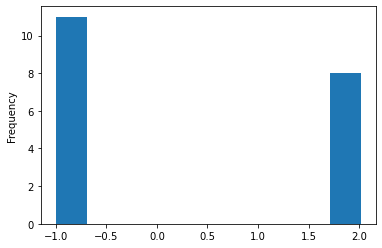

In [13]:
df['r_result'].plot.hist()

In [14]:
expectency = df['r_result'].mean()
print('Expectency: ' + str(expectency)) # How many R i will win or loose per trade
print('Number trades: ' + str(len(df)))

Expectency: 0.2674433062522864
Number trades: 19


In [15]:
std_r = df['r_result'].std()
sqn = (expectency / std_r) * math.sqrt(len(df))
sqn

0.765879333507505